## 네이버 영화 평점 댓글을 통한 키워드 분석

- 데이터: 네이버 영화 평점 데이터 (출처: https://github.com/e9t/nsmc)

In [1]:
import pandas as pd
import numpy as np
import wordcloud
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('data/ratings.txt', delimiter='\t')

In [3]:
df.head()

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [4]:
len(df)

200000

In [5]:
df['document'].head()

0                                  어릴때보고 지금다시봐도 재밌어요ㅋㅋ
1    디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...
2                 폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.
3    와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...
4                          안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.
Name: document, dtype: object

In [6]:
df.isnull().sum()

id          0
document    8
label       0
dtype: int64

In [7]:
df = df.dropna()

In [8]:
text = ' '.join(df['document'])

## WordCloud

In [9]:
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from konlpy.tag import Okt
import re

In [10]:
text[:300]

'어릴때보고 지금다시봐도 재밌어요ㅋㅋ 디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데. 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다. 폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고. 와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런게 진짜 영화지 안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화. 사랑을 해본사람이라면 처음부터 끝까지 웃'

In [11]:
pattern = re.compile('[ ㄱ-ㅣ가-힣A-Za-z]')
sentence = pattern.findall(text)
sentence = ''.join(sentence)
sentence[:300]

'어릴때보고 지금다시봐도 재밌어요ㅋㅋ 디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다 폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고 와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지 안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화 사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화 완전 감동입'

In [12]:
len(sentence)

6699409

In [13]:
def preprocessing(sentence):
    pattern = re.compile('[ ㄱ-ㅣ가-힣A-Za-z]')
    sentence = pattern.findall(sentence)
    sentence = ''.join(sentence)
    return sentence

In [14]:
df['document_clean'] = df['document'].apply(preprocessing)
df['document_clean'].head()

0                                  어릴때보고 지금다시봐도 재밌어요ㅋㅋ
1    디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...
2                     폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고
3     와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지
4                           안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화
Name: document_clean, dtype: object

In [15]:
from collections import Counter
from nltk.corpus import stopwords

In [16]:
words = sentence.split()
counter = Counter()
counter.update(words)
most_common = counter.most_common(50)
most_common

[('영화', 23721),
 ('너무', 11115),
 ('정말', 10685),
 ('진짜', 8399),
 ('이', 6921),
 ('왜', 4479),
 ('그냥', 4448),
 ('더', 4422),
 ('이런', 4360),
 ('수', 3900),
 ('영화를', 3830),
 ('점', 3808),
 ('잘', 3560),
 ('다', 3533),
 ('보고', 3478),
 ('좀', 3402),
 ('영화는', 3340),
 ('그', 3287),
 ('영화가', 3275),
 ('본', 3071),
 ('최고의', 2987),
 ('봤는데', 2906),
 ('내가', 2761),
 ('ㅋㅋ', 2740),
 ('없는', 2701),
 ('이건', 2653),
 ('없다', 2502),
 ('드라마', 2476),
 ('이렇게', 2463),
 ('평점', 2439),
 ('이거', 2381),
 ('완전', 2363),
 ('있는', 2346),
 ('이게', 2320),
 ('좋은', 2272),
 ('참', 2262),
 ('아', 2173),
 ('평점이', 2173),
 ('내', 2130),
 ('다시', 2128),
 ('보는', 2116),
 ('연기', 2104),
 ('그리고', 2081),
 ('역시', 2017),
 ('많이', 1980),
 ('쓰레기', 1955),
 ('것', 1937),
 ('최고', 1927),
 ('난', 1908),
 ('스토리', 1864)]

In [17]:
stopwords = {'너무', '정말', '진짜', '이', '왜', '그냥', 
             '더', '이런', '수', '점', '잘', '다', '보고', 
             '좀', '영화는', '영화를', '점', '잘', '다', '보고', 
             '좀', '영화는', '영화가', '본', '봤는데', '내가', '없는',
             '이건', '없다', '이렇게', '이거', '있는', 
             '이게', '참', '아', '내', '것', '난', '그리고', 
            }

In [18]:
wordcloud = WordCloud(
    font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
    width = 800,
    height = 800, 
    stopwords=stopwords
)
wc = wordcloud.generate_from_text(sentence)

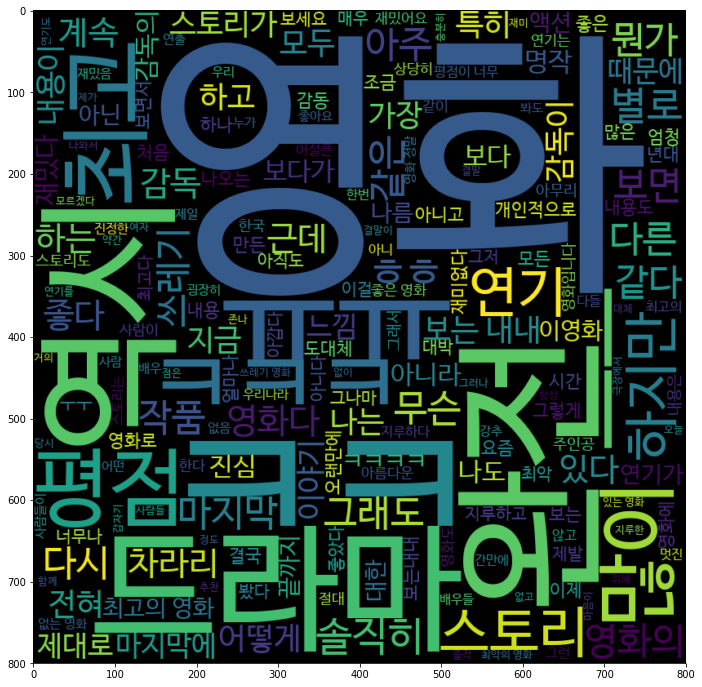

In [19]:
array = wc.to_array()
fig = plt.figure(figsize=(12, 12))
plt.imshow(array, interpolation="bilinear")
plt.show()
fig.savefig('wordcloud_without_axisoff.png')

In [20]:
from konlpy.tag import Okt

In [21]:
tokenizer = Okt()

In [ ]:
sentence_clean = tokenizer.morphs(sentence)

In [ ]:
sentence_clean = ' '.join(sentence_clean)

In [ ]:
wordcloud = WordCloud(
    font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
    width = 800,
    height = 800, 
    stopwords=stopwords
)
wc = wordcloud.generate_from_text(sentence_clean)

In [ ]:
array = wc.to_array()
fig = plt.figure(figsize=(12, 12))
plt.imshow(array, interpolation="bilinear")
plt.show()
fig.savefig('wordcloud_without_axisoff.png')

## 모듈을 함수형으로 구현하기

In [ ]:
def show_wordcloud(sentence, stopwords=None):
    wordcloud = WordCloud(
        font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
        width = 800,
        height = 800, 
        stopwords=stopwords
    )
    wc = wordcloud.generate_from_text(sentence)

    array = wc.to_array()
    fig = plt.figure(figsize=(12, 12))
    plt.imshow(array, interpolation="bilinear")
    plt.show()
    fig.savefig('wordcloud_without_axisoff.png')

## 긍정 vs 부정 키워드 분석

긍정 키워드 분석

In [ ]:
positive = df.loc[df['label'] == 1].head(5000)

In [ ]:
positive_sentence = positive['document_clean']
positive_text = ' '.join(positive_sentence)

In [ ]:
positive_text[:300]

In [ ]:
okt_tokenizer = Okt()

def tokenize_and_merge(sentence, tokenizer):
    sentence_clean = tokenizer.morphs(sentence)
    sentence_clean = ' '.join(sentence_clean)
    return sentence_clean

In [ ]:
positive_text = tokenize_and_merge(positive_text, okt_tokenizer)

In [ ]:
stopwords = ['너무', '정말', '진짜', '이', '왜', '그냥', 
             '더', '이런', '수', '점', '잘', '다', '보고', 
             '좀', '영화는', '영화를', '점', '잘', '다', '보고', 
             '좀', '영화는', '영화가', '본', '봤는데', '내가', '없는',
             '이건', '없다', '이렇게', '이거', '있는', 
             '이게', '참', '아', '내', '것', '난', '그리고', '영화', '에서',
             '으로', '하는', '이다', '입니다', '하고', '까지', '있다', '이라는', '인데', 
            ]

In [ ]:
show_wordcloud(positive_text, stopwords)

부정 키워드 분석

In [ ]:
negative = df.loc[df['label'] == 0].head(5000)

In [ ]:
negative_sentence = negative['document_clean']
negative_text = ' '.join(negative_sentence)

In [ ]:
negative_text = tokenize_and_merge(negative_text, okt_tokenizer)

In [ ]:
negative_text[:300]

In [ ]:
show_wordcloud(negative_text, stopwords)

## Most Common (자주 쓰이는 단어 추출)

In [ ]:
positive_words = [w for w in positive_text.split() if len(w) > 1 and w not in stopwords]
counter = Counter()
counter.update(positive_words)
positive_most_common = counter.most_common(30)
positive_most_common

In [ ]:
def get_most_common(sentence, min_length, stopwords):
    words = [w for w in positive_text.split() if len(w) >= min_length and w not in stopwords]
    counter = Counter()
    counter.update(words)
    return dict(counter.most_common())

In [ ]:
positive_most_common = get_most_common(positive_text, 2, stopwords)

In [ ]:
positive_top_30 = positive_most_common[:30]

In [ ]:
sns.barplot(x=list(positive_most_common.keys()), y=list(positive_most_common.values()))

In [ ]:
positive_words = [w for w in positive_text.split() if len(w) > 1 and w not in stopwords]
counter = Counter()
counter.update(positive_words)
positive_most_common = counter.most_common(30)
positive_most_common